# Shor's algorithm

## Background
The goal of Shor's algorithm is to factorize an integer $N$ into the product of two smaller integers.
Given an integer $a$ coprime to $N$, we want to find a power $p$ such that $a^p \mod N = 1$.
The condition can be reformulated as $(a^{p/2}+1)(a^{p/2}-1) = mN$, where m is an integer.
If either $(a^{p/2}+1)$ or $(a^{p/2}-1)$ shares a nontrivial factor with $N$, then we successfully factorize $N$. Otherwise, we choose another $a$ and start over.

## Implementation in geqo
Shor's algorithm is part of geqo's algorithm library. The function can be imported from `geqo.algorithms` and it can be called with `Shor(N, a)` where $N$ is the number to be factorized and `a` is the number for which the order $p$ has to be found. The function generates a quantum circuit that corresponds to Shor's algorithm with the chosen parameters.

## Example for Shor's algorithm
In the following example, we factorize $N= 15$ and we choose $a =7$.

In [1]:
from geqo.algorithms import Shor, InverseQFT
from geqo.simulators import simulatorStatevectorNumpy, statevectorSimulatorCuPy
from geqo.visualization import plot_mpl
from geqo.utils import bin2num

First, we generate the quantum circuit and we show the corresponding circuit diagram.

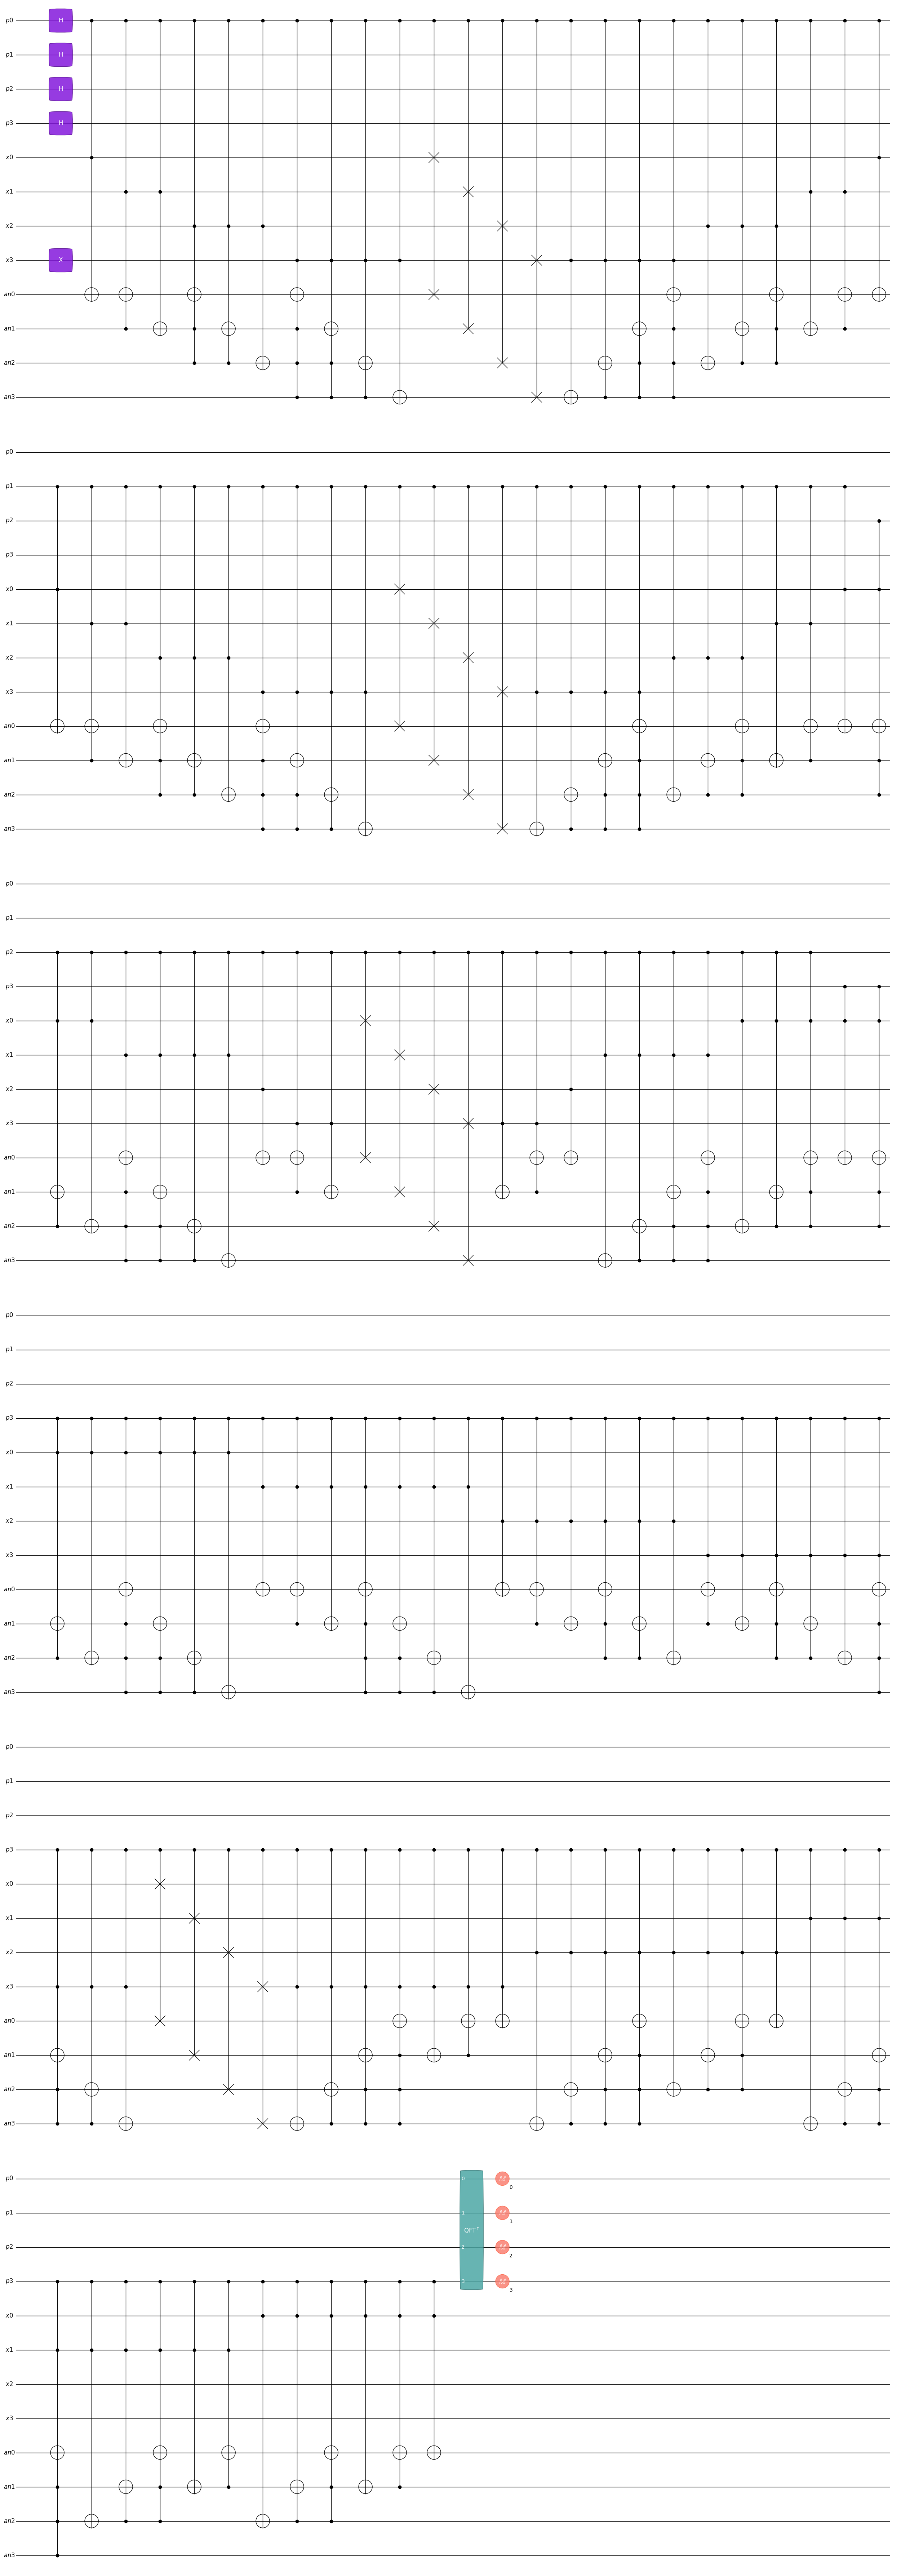

In [2]:
shor = Shor(N=15, a=7)
plot_mpl(shor, style="jos")

In the following, the circuit is simulated with `simulatorStatevectorNumpy`. As the constructed circuit uses a QFT, we have to call the `prepareBackend` function with the appropriate QFT.

In [8]:
sim = simulatorStatevectorNumpy(12, 4)
sim.prepareBackend([InverseQFT(4)])
sim.apply(shor, [*range(12)], [*range(4)])
sim.measurementResult

{(0, 0, 0, 0): np.float64(0.24999999999999967),
 (0, 0, 0, 1): np.float64(0.0),
 (0, 0, 1, 0): np.float64(0.0),
 (0, 0, 1, 1): np.float64(0.0),
 (0, 1, 0, 0): np.float64(0.24999999999999967),
 (0, 1, 0, 1): np.float64(0.0),
 (0, 1, 1, 0): np.float64(0.0),
 (0, 1, 1, 1): np.float64(0.0),
 (1, 0, 0, 0): np.float64(0.24999999999999967),
 (1, 0, 0, 1): np.float64(0.0),
 (1, 0, 1, 0): np.float64(0.0),
 (1, 0, 1, 1): np.float64(0.0),
 (1, 1, 0, 0): np.float64(0.24999999999999967),
 (1, 1, 0, 1): np.float64(0.0),
 (1, 1, 1, 0): np.float64(0.0),
 (1, 1, 1, 1): np.float64(0.0)}

## Classical post-processing
The measurement results of the simulation can be used by the following post-processing procedure to derive the factors of $N$.

In [4]:
from fractions import Fraction
from math import gcd

measured = []
for key, item in sim.measurementResult.items():
    if item > 1e-5:
        measured.append(bin2num(key) / 2**4)

print("[1/p, 2/p, ..., (p-1)/p] :", measured)

x = measured[1] - measured[0]
f = Fraction(x).limit_denominator()
p = f.denominator
print("hidden period p = ", p)
gcd1 = gcd(int(7 ** (p / 2) + 1), 15)
gcd2 = gcd(int(7 ** (p / 2) - 1), 15)
if gcd1 != 1:
    factor1 = gcd1
    factor2 = int(15 / gcd1)
else:
    factor1 = gcd2
    factor2 = int(15 / gcd2)

if (factor1, factor2) in [(1, 15), (15, 1)]:
    print("Choose another 'a' and run the Shor's algorithm again.")
else:
    print(f"15 can be factored into {factor1} * {factor2}")

[1/p, 2/p, ..., (p-1)/p] : [0.0, 0.25, 0.5, 0.75]
hidden period p =  4
15 can be factored into 5 * 3


## Factorize greater numbers with CuPy
In the following example, we factorize $N = 51$ and $N= 111$ with `statevectorSimulatorCuPy`. We choose $a = 5$ and $a =11$ respectively.

In [5]:
from fractions import Fraction
from math import gcd

shor51 = Shor(51, 5)
sim = statevectorSimulatorCuPy(18, 6)
sim.prepareBackend([InverseQFT(6)])
sim.apply(shor51, [*range(18)], [*range(6)])

measured = []
for key, item in sim.measurementResult.items():
    if item > 1e-5:
        measured.append(bin2num(key) / 2**6)

x = measured[1] - measured[0]
f = Fraction(x).limit_denominator()
p = f.denominator
print("hidden period p = ", p)
gcd1 = gcd(int(5 ** (p / 2) + 1), 51)
gcd2 = gcd(int(5 ** (p / 2) - 1), 51)
if gcd1 != 1:
    factor1 = gcd1
    factor2 = int(51 / gcd1)
else:
    factor1 = gcd2
    factor2 = int(51 / gcd2)

if (factor1, factor2) in [(1, 51), (51, 1)]:
    print("Choose another 'a' and run the Shor's algorithm again.")
else:
    print(f"51 can be factored into {factor1} * {factor2}")

hidden period p =  16
51 can be factored into 17 * 3


In [ ]:
from fractions import Fraction
from math import gcd

shor111 = Shor(111, 11)
sim = statevectorSimulatorCuPy(21, 7)
sim.prepareBackend([InverseQFT(7)])
sim.apply(shor111, [*range(21)], [*range(7)])

measured = []
for key, item in sim.measurementResult.items():
    if item > 1e-5:
        measured.append(bin2num(key) / 2**7)

x = measured[1] - measured[0]
f = Fraction(x).limit_denominator()
p = f.denominator
print("hidden period p = ", p)
gcd1 = gcd(int(11 ** (p / 2) + 1), 111)
gcd2 = gcd(int(11 ** (p / 2) - 1), 111)
if gcd1 != 1:
    factor1 = gcd1
    factor2 = int(111 / gcd1)
else:
    factor1 = gcd2
    factor2 = int(111 / gcd2)

if (factor1, factor2) in [(1, 111), (111, 1)]:
    print("Choose another 'a' and run the Shor's algorithm again.")
else:
    print(f"111 can be factored into {factor1} * {factor2}")

hidden period p =  128
111 can be factored into 3 * 37


## Conversion to OpenQASM3 code
The quantum circuit for Shor's algorithm can be converted to OpenQASM3 code. 

In [9]:
dshor = Shor(N=15, a=7, decompose=True)
code = sim.sequence_to_qasm3(dshor)
print(code)

OPENQASM 3.0; 
include 'stdgates.inc';
qubit[12] q;
bit[4] c;
x q[x3];
h q[p0];
h q[p1];
h q[p2];
h q[p3];
ccx q[p0], q[x0], q[an0];
ccx q[an1], q[p1], q[an0];
ccx q[p0], q[x1], q[p1];
ccx q[an1], q[p1], q[an0];
ccx q[p0], q[x1], q[p1];
ccx q[p0], q[x1], q[an1];
ccx q[an2], q[p2], q[an0];
ccx q[an1], q[p1], q[p2];
ccx q[p0], q[x2], q[p1];
ccx q[an1], q[p1], q[p2];
ccx q[an2], q[p2], q[an0];
ccx q[an1], q[p1], q[p2];
ccx q[p0], q[x2], q[p1];
ccx q[an1], q[p1], q[p2];
ccx q[an2], q[p1], q[an1];
ccx q[p0], q[x2], q[p1];
ccx q[an2], q[p1], q[an1];
ccx q[p0], q[x2], q[p1];
ccx q[p0], q[x2], q[an2];
ccx q[an3], q[p3], q[an0];
ccx q[an2], q[p2], q[p3];
ccx q[an1], q[p1], q[p2];
ccx q[p0], q[x3], q[p1];
ccx q[an1], q[p1], q[p2];
ccx q[an2], q[p2], q[p3];
ccx q[an3], q[p3], q[an0];
ccx q[an2], q[p2], q[p3];
ccx q[an1], q[p1], q[p2];
ccx q[p0], q[x3], q[p1];
ccx q[an1], q[p1], q[p2];
ccx q[an2], q[p2], q[p3];
ccx q[an3], q[p2], q[an1];
ccx q[an2], q[p1], q[p2];
ccx q[p0], q[x3], q[p1];
ccx q[an2

In [10]:
print(
    "number of basic gates (PauliX, Hadamard, Toffoli, Swap, controlled-Phase):",
    len(dshor.gatesAndTargets),
)

number of basic gates (PauliX, Hadamard, Toffoli, Swap, controlled-Phase): 593
